In [176]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [177]:
df = pd.read_csv(r'modeling_df.csv')

In [178]:
df =df.reset_index(drop=True)
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0','index'] ,axis=1 )
df_2016 = df[df['year'] == 2016]
df_2017 = df[df['year'] == 2017]


In [179]:
df

,playerName,totalCash,team,salary,year,position,team_record,wins
0,Jeremy Clark,496413,NYJ,348000,2017,DT,6-11-0,6
1,Jeremy Clark,555000,NYJ,555000,2018,DT,4-10-0,4
2,Darius Jennings,51176,CLE,51176,2015,WR,3-12-0,3
3,Darius Jennings,79200,CLE,79200,2015,WR,3-12-0,3
4,Darius Jennings,51176,CLE,51176,2015,WR,3-12-0,3
...,...,...,...,...,...,...,...,...
2523,Justin Hardee,410294,NO,410294,2017,WR,11-6-0,11
2524,DeVante Parker,6605213,MIA,435000,2015,WR,4-10-1,4
2525,DeVante Parker,929389,MIA,929389,2016,WR,11-5-0,11
2526,DeVante Parker,1423776,MIA,1423776,2017,WR,6-11-0,6


In [180]:
df_2016

,playerName,totalCash,team,salary,year,position,team_record,wins
5,Darius Jennings,27600,CLE,27600,2016,WR,1-14-0,1
6,Darius Jennings,6900,CHI,6900,2016,WR,3-13-0,3
7,Darius Jennings,27600,NYJ,27600,2016,WR,4-12-0,4
15,Bradley McDougald,2553000,TB,2553000,2016,S,8-8-0,8
24,Chris Culliver,873117,MIA,798117,2016,DB,11-5-0,11
...,...,...,...,...,...,...,...,...
2491,Ross Cockrell,681720,PIT,600000,2016,DB,11-5-0,11
2498,David Irving,525000,DAL,525000,2016,DT,13-3-0,13
2506,Brandon Graham,4000000,PHI,4000000,2016,DE,7-9-0,7
2518,Chris Maragos,2500000,PHI,1500000,2016,S,7-9-0,7


In [181]:
pos_df_2016 = df_2016.groupby(['team','wins','position']).sum().reset_index()
pos_df_2016


,team,wins,position,totalCash,year
0,ARI,6,C,6900,2016
1,ARI,6,DB,13636495,8064
2,ARI,6,LB,1083077,4032
3,ARI,6,LS,79410,2016
4,ARI,6,OL,13800,4032
...,...,...,...,...,...
267,WAS,9,OL,1399347,2016
268,WAS,9,OLB,2798667,4032
269,WAS,9,QB,3000000,2016
270,WAS,9,TE,35000,2016


In [182]:
offensive_2016 = pos_df_2016[pos_df_2016['position'].isin(["WR", "OT", "OG", "C", "TE", "QB", "FB", "RB", "OL"])]

In [183]:
offensive_2016 = offensive_2016.groupby(['team','wins']).sum().reset_index()
offensive_2016


,team,wins,totalCash,year
0,ARI,6,11444229,10080
1,ATL,11,16553823,10080
2,BAL,8,22411061,22176
3,BUF,8,17310078,12096
4,CAR,7,5221584,24192
5,CHI,3,12038742,16128
6,CIN,6,14592946,10080
7,CLE,1,6069613,22176
8,DAL,13,24486595,14112
9,DEN,8,14955499,20160


In [184]:
linear_df = offensive_2016

Coefficients: 
 [[7.84677086e-08]]
Mean squared error: 6.28
Coefficient of determination: 0.21


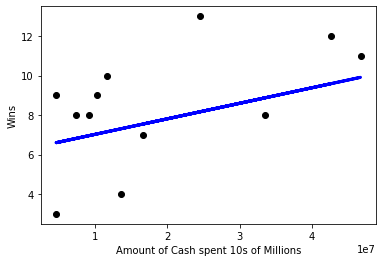

In [185]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
X = np.array(linear_df['totalCash']).reshape(-1, 1)
y = np.array(linear_df['wins']).reshape(-1,1)

# Split the totalCash spent into training and test set
X_train = X[:20]
X_test = X[20:]

# Split the predicted wins into training and test set
y_train = y[:20]
y_test = y[20:]


reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)


#https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
y_pred = reg.predict(X_test)

# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.xlabel('Amount of Cash spent 10s of Millions')
plt.ylabel('Wins')
plt.show()

In [186]:


QB_df = pos_df[pos_df['position'] == 'QB'].reset_index().drop(['index','position'], axis = 1)
RB_df = pos_df[pos_df['position'] == 'RB'].reset_index().drop(['index','position'], axis =1)
RB_df

,team,wins,totalCash,year
0,ARI,6,423529,2016
1,ATL,11,778823,4032
2,BAL,8,7600000,4032
3,BUF,8,12100000,4032
4,CAR,7,700000,2016
5,CHI,3,698022,2016
6,CIN,6,991250,2016
7,CLE,1,600000,2016
8,DAL,13,14395644,2016
9,DEN,8,6000000,2016


In [187]:
QB_df

,team,wins,totalCash,year
0,ATL,11,1750000,2016
1,CHI,3,2000000,2016
2,CLE,1,352140,4032
3,DEN,8,6066852,4032
4,DET,10,17000000,2016
5,HOU,10,1325000,2016
6,JAX,3,574274,2016
7,KC,11,847716,4032
8,LA,4,582285,2016
9,LAC,5,1065000,2016


In [188]:

QB_df['QB_spend'] = QB_df['totalCash']
QB_df['RB_spend'] = RB_df['totalCash']
spend_df = QB_df

In [190]:
#https://numpy.org/doc/stable/reference/generated/numpy.where.html
#Create an extra colum to check if a team has more than 10 wins
spend_df['ten_or_more_wins'] = np.where(spend_df['wins'] > 10 , True, False)

In [191]:
spend_df

,team,wins,totalCash,year,QB_spend,RB_spend,ten_or_more_wins
0,ATL,11,1750000,2016,1750000,423529,True
1,CHI,3,2000000,2016,2000000,778823,False
2,CLE,1,352140,4032,352140,7600000,False
3,DEN,8,6066852,4032,6066852,12100000,False
4,DET,10,17000000,2016,17000000,700000,False
5,HOU,10,1325000,2016,1325000,698022,False
6,JAX,3,574274,2016,574274,991250,False
7,KC,11,847716,4032,847716,600000,True
8,LA,4,582285,2016,582285,14395644,False
9,LAC,5,1065000,2016,1065000,6000000,False
